In [1]:
import scipy.stats as stats
import pandas as pd
import urllib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm
#import smogn #회귀 문제를 위한 SMOTE 오버 샘플링 기법
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#from imblearn.over_sampling import SMOTENC

In [2]:
# 데이터 셋 불러오기 (KS값)
data = pd.read_csv('C:/Users/leewa/Desktop/공정변수.csv',encoding='euc-kr')

In [4]:
data = pd.read_csv('C:/Users/leewa/Desktop/공정변수.csv',encoding='euc-kr')
x = data[['Dorosperse Red KKL', 'Dorosperse Blue KKL', 'Dorosperse B/K KKL',
       'Dorosperse Dark Grey KKL', 'Dorosperse Brown K-3LR',
       'Dianix Yellow AM-2R', 'Dianix Red AM-SLR', 'Dianix Blue AM-2G',
       'Dianix Black AM-SLR', 'Dianix Grey AM-SLR', 'Dianix Yellow Brown AM-R',
       'Dorosperse Yellow KKL', 'Dorosperse Black KKL','Dorosperse Red KKL_prop', 'Dorosperse Blue KKL_prop', 'Dorosperse B/K KKL_prop',
       'Dorosperse Dark Grey KKL_prop', 'Dorosperse Brown K-3LR_prop',
       'Dianix Yellow AM-2R_prop', 'Dianix Red AM-SLR_prop', 'Dianix Blue AM-2G_prop',
       'Dianix Black AM-SLR_prop', 'Dianix Grey AM-SLR_prop', 'Dianix Yellow Brown AM-R_prop',
       'Dorosperse Yellow KKL_prop', 'Dorosperse Black KKL_prop','배합_Sunsolt RM-340S', '배합_빙초산', 'Lab 염색 시작온도', 'Lab 염색 상승속도 #1',
       'Lab 염색 상승온도 #1', 'Lab 염색 상승온도 #1 유지시간', 'Lab 염색 상승속도 #2',
       'Lab 염색 상승온도 #2', 'Lab 염색 상승온도 #2 유지시간', 'Lab 염색 상승속도 #3',
       'Lab 염색 상승온도 #3', 'Lab 염색 상승온도 #3 유지시간', 'Lab 염색 하강속도 #1',
       'Lab 염색 하강온도 #1', 'Lab 염색 하강온도 #1 유지시간', 'Lab 염색 하강속도 #2',
       'Lab 염색 하강온도 #2', 'Lab 염색 하강온도 #2 유지시간', 'Lab 염색 하강속도 #3',
       'Lab 염색 하강온도 #3', 'Lab 염색 하강온도 #3 유지시간', 'Lab 염색 종료속도', 'Lab 염색 종료온도',
       'Lab 염색 종료온도 유지시간']]
y = data[['잔욕염색 검사_K/S']]
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, test_size=0.2, random_state=42)

In [5]:
GB = GradientBoostingRegressor(n_estimators = 500,max_depth=8, min_samples_split=7,random_state=0)
GB.fit(x_train,y_train)
y_pred = GB.predict(x)    
print("training set score: {:.2f}".format(GB.score(x_train, y_train))) # 훈련셋 결정계수
print("test set score: {:.2f}".format(GB.score(x_test, y_test))) # 테스트셋 결정계수
print("r^2 score: {:.4f}".format(r2_score(y, y_pred))) # r2스코어
print("MAE score: {:.4f}".format(mean_absolute_error(y,y_pred))) # MAE스코어
print("MSE score: {:.4f}".format(mean_squared_error(y,y_pred))) # MSE스코어
GB.score(x_test,y_test)

C:\Users\leewa\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training set score: 1.00
test set score: 0.81
r^2 score: 0.9578
MAE score: 0.0072
MSE score: 0.0012


0.8084582188297551

C:\Users\leewa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='잔욕염색 검사_K/S'>

C:\Users\leewa\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51092 (\N{HANGUL SYLLABLE JAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\leewa\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50837 (\N{HANGUL SYLLABLE YOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\leewa\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50684 (\N{HANGUL SYLLABLE YEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\leewa\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49353 (\N{HANGUL SYLLABLE SAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\leewa\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\leewa\Anacond

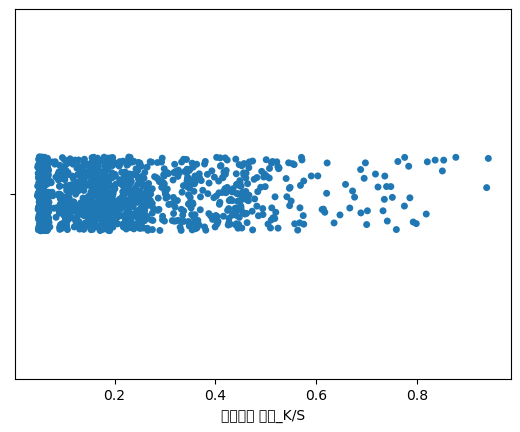

In [6]:
sns.stripplot(data['잔욕염색 검사_K/S'])